In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#charger le fichier si present si pas present le creer :
try :
    liga1 =pd.read_csv("C:/Users/USER/Documents/projet&code/datasets/football/liga1/liga1824.csv")
except FileNotFoundError :
    fichiers = {
        "C:/Users/USER/Documents/projet&code/datasets/football/liga1/SP12018.csv": "2018/2019",
        "C:/Users/USER/Documents/projet&code/datasets/football/liga1/SP12019.csv": "2019/2020",
        "C:/Users/USER/Documents/projet&code/datasets/football/liga1/SP12020.csv": "2020/2021",
        "C:/Users/USER/Documents/projet&code/datasets/football/liga1/SP12021.csv": "2021/2022",
        "C:/Users/USER/Documents/projet&code/datasets/football/liga1/SP12022.csv": "2022/2023",
        "C:/Users/USER/Documents/projet&code/datasets/football/liga1/SP12023.csv": "2023/2024",
        "C:/Users/USER/Documents/projet&code/datasets/football/liga1/SP12024.csv": "2024/2025",
    }

    # Liste pour stocker les DataFrames
    dfs = []

    # Charger les fichiers un par un
    for fichier, saison in fichiers.items():
        df = pd.read_csv(fichier)
        df["Saison"] = saison  # Ajouter la saison dans une nouvelle colonne
        dfs.append(df)

    # Fusionner tous les DataFrames en un seul
    liga1 = pd.concat(dfs, ignore_index=True)
    #creer le fichier
    liga1.to_csv("C:/Users/USER/Documents/projet&code/datasets/football/liga1/liga1824.csv", index=False)
print(liga1.shape)

print(liga1.columns)






(2459, 24)
Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
       'HR', 'AR', 'B365H', 'B365D', 'B365A'],
      dtype='object')


In [2]:
colonnes_utiles = [
    'Date','HomeTeam','AwayTeam',
    'FTHG','FTAG','FTR',
    'HTHG','HTAG','HTR',
    'HS','AS','HST','AST',
    'HF','AF','HC','AC',
    'HY','AY','HR','AR',
]


In [3]:
# netoyage des donnes
liga1["HST"] = liga1["HST"].fillna(0)
liga1["AST"] = liga1["AST"].fillna(0)
liga1["HF"] = liga1["HF"].fillna(0)
liga1["AF"] = liga1["AF"].fillna(0)

#enlever les lignes inutiles
liga1= liga1[colonnes_utiles]
print(liga1.shape)
# Supprimer les lignes sans issue de match (FTR)
liga1 = liga1.dropna(subset=["FTR"])
print(liga1.head(3))
print(liga1.shape)
print(liga1.columns)

##
liga1['Date'] = pd.to_datetime(liga1['Date'])

liga1['Month'] = liga1['Date'].dt.month
liga1['Day'] = liga1['Date'].dt.day
liga1['Year'] = liga1['Date'].dt.year
# First, ensure 'Year', 'Month', and 'Day' are integers
liga1[['Year', 'Month', 'Day']] = liga1[['Year', 'Month', 'Day']].astype(int)
liga1['Date'] = liga1['Year'] * 10000 + liga1['Month'] * 100 + liga1['Day']
# Drop the the table less used :
liga1=liga1.drop(columns=['Day','Month', 'Year'])
print(liga1.head(3))
print(liga1.shape)
print(liga1.columns)

(2459, 21)
       Date   HomeTeam    AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  HS  ...  \
0  19700101      Betis     Levante     0     3   A     0     1   A  22  ...   
1  19700101     Girona  Valladolid     0     0   D     0     0   D  13  ...   
2  19700101  Barcelona      Alaves     3     0   H     0     0   D  25  ...   

   HST  AST  HF  AF  HC  AC  HY  AY  HR  AR  
0    8    4  10  10   5   3   0   2   0   0  
1    1    1  21  20   3   2   1   1   0   0  
2    9    0   6  13   7   1   0   2   0   0  

[3 rows x 21 columns]
(2459, 21)
Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
       'HR', 'AR'],
      dtype='object')
       Date   HomeTeam    AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  HS  ...  \
0  19700101      Betis     Levante     0     3   A     0     1   A  22  ...   
1  19700101     Girona  Valladolid     0     0   D     0     0   D  13  ...   
2  19700101  Barcelon

In [4]:
liga1.to_csv("C:/Users/USER/Documents/projet&code/datasets/football/liga1/liga1824.csv", index=False)
#Save the file

encodage 

In [5]:
liga1 = pd.get_dummies(liga1, columns=["HomeTeam", "AwayTeam"], drop_first=True)

# Définir X et y
y = liga1["FTR"].map({"H": 0, "D": 1, "A": 2})  # cible
X = liga1.drop(columns=["FTR", "HTR", "HTHG","HTAG","FTAG","FTHG"], errors="ignore")  # variables d'entrée

pca


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
n_components = 33
pca = PCA(n_components=n_components)
X_train_reduced = pca.fit_transform(X_train)


apprentisage

In [7]:


model_pca = RandomForestClassifier(n_estimators=100, random_state=42)

   # Fit the model on the reduced training data
model_pca.fit(X_train_reduced, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# #evaluer le modele
X_test_reduced = pca.transform(X_test)
y_pred_pca = model_pca.predict(X_test_reduced)

print("Accuracywith pca :", accuracy_score(y_test, y_pred_pca))
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_pca))
print("Rapport de classification :")
print(classification_report(y_test, y_pred_pca))


Accuracywith pca : 0.5853658536585366
Matrice de confusion :
[[195  23  20]
 [ 69  27  26]
 [ 43  23  66]]
Rapport de classification :
              precision    recall  f1-score   support

           0       0.64      0.82      0.72       238
           1       0.37      0.22      0.28       122
           2       0.59      0.50      0.54       132

    accuracy                           0.59       492
   macro avg       0.53      0.51      0.51       492
weighted avg       0.56      0.59      0.56       492



In [9]:
importances = model_pca.feature_importances_
feature_names = ['PC' + str(i+1) for i in range(n_components)]
sorted_indices = importances.argsort()
sorted_feature_importance = [(feature_names[i], importances[i]) for i in range(len(feature_names))]
sorted_feature_importance.sort(key=lambda x: x[1], reverse=True)
for feature, score in sorted_feature_importance:
       print(f"{feature}: {score}")


PC7: 0.07061284984924777
PC5: 0.06581549248486422
PC9: 0.05019702020529301
PC10: 0.03746721495584302
PC13: 0.03738931912801945
PC1: 0.03516318430466237
PC6: 0.03240089327765919
PC3: 0.03093054251050287
PC12: 0.02988471259438359
PC22: 0.02965242273295223
PC17: 0.029375030055071746
PC2: 0.028707356703607256
PC20: 0.02742689813083021
PC16: 0.027245423911591918
PC4: 0.027143772444101984
PC29: 0.02712110145659582
PC19: 0.02703948260454079
PC30: 0.02703467472693953
PC11: 0.02682361621574219
PC33: 0.026651426280591826
PC25: 0.026609494134247413
PC21: 0.026518977517005226
PC23: 0.026514685469214157
PC24: 0.02637786241888269
PC31: 0.02628930818579373
PC26: 0.025972084400070917
PC15: 0.025395729894976328
PC28: 0.024921871719867376
PC18: 0.02484110370734739
PC32: 0.024496977421600605
PC14: 0.02403857321586306
PC27: 0.023940897342090164
PC8: 0.0


plot importance

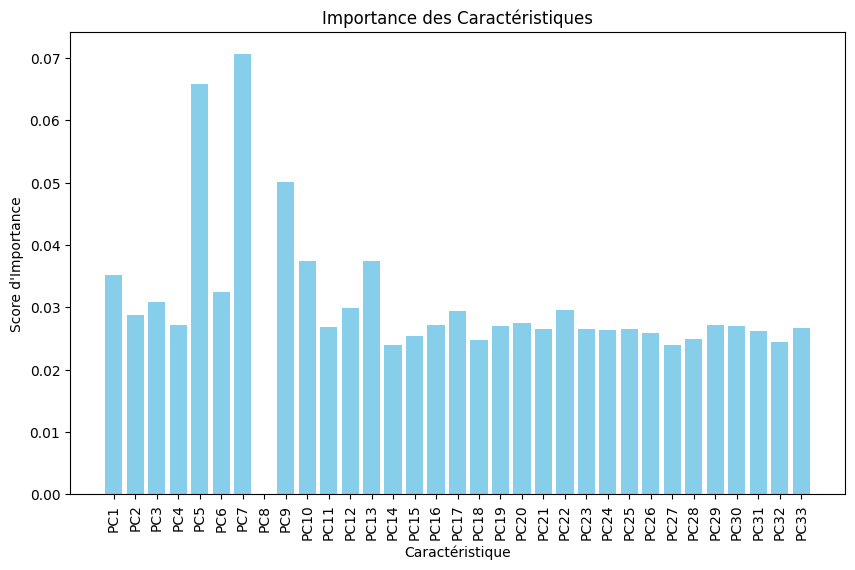

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title("Importance des Caractéristiques")
plt.bar(range(len(feature_names)), importances, align="center", color="#87CEEB", label="Importance")
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.xlabel("Caractéristique")
plt.ylabel("Score d'Importance")
plt.show()

In [11]:
loadings = pca.components_.shape
# Obtenir les noms d'origine des colonnes
original_features = X.columns

# Créer un DataFrame pour visualiser les poids de chaque feature sur chaque composante
pca_df = pd.DataFrame(pca.components_, columns=original_features, index=feature_names)
print("Top features dans la composante PC15 :")
print(pca_df.loc["PC5"].sort_values(key=abs, ascending=False).head(5))
print("Top features dans la composante PC13 :")
print(pca_df.loc["PC13"].sort_values(key=abs, ascending=False).head(5))
print("Top features dans la composante PC8 :")
print(pca_df.loc["PC8"].sort_values(key=abs, ascending=False).head(5))
print("Top features dans la composante PC11(la plus basse) :")
print(pca_df.loc["PC11"].sort_values(key=abs, ascending=False).head(5))

Top features dans la composante PC15 :
HC     0.877481
HST   -0.332741
AC    -0.222039
HS    -0.200488
AST    0.133756
Name: PC5, dtype: float64
Top features dans la composante PC13 :
HR                     0.940418
AR                    -0.289042
HomeTeam_Betis         0.082632
HomeTeam_Ath Madrid    0.052181
HY                    -0.047906
Name: PC13, dtype: float64
Top features dans la composante PC8 :
Date    1.0
HS      0.0
AS      0.0
HST     0.0
AST     0.0
Name: PC8, dtype: float64
Top features dans la composante PC11(la plus basse) :
HY    0.739174
AY   -0.659319
HF   -0.088806
AF    0.070791
AR   -0.036138
Name: PC11, dtype: float64


Ce modele est caduc je lui ait donné les resultats dans les variablees d'entrée donc il apprend juste a tricher
je vais plutot l'entrainner sur :
Moyennes de tirs, fautes, possession sur les matchs précédents ect moy de jaune et tt
Historique des performances
je dois recommencer dans un autre fichier

